Here we analyze a bike sharing dataset from the following link:
https://www.kaggle.com/marklvl/bike-sharing-dataset

In this dataset, the number of rented bikes in DC, among other features such as time, weather condition, day of the week and etc., are provided.
In this code we try to use this dataset to predict the number of rented bikes given other features.
We first decide to treat which features categorical and which ones as numerical features.
Then we split the data to training and testing set.
We use Regression Tree to predict the rented number of bikes.
Finally, we evaluate the performance of our method.
This process has been done twice, once on the hourly data and once again on the daily data.
On the daily data we found an anomaly, and the reason for that turned out to be very interesting which you'll read more about it towards the end of this code.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [2]:
day = pd.read_csv('day.csv')#,parse_dates=['dteday'])
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [3]:
hour = pd.read_csv('hour.csv',parse_dates=['dteday'])
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
hour.columns

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt'],
      dtype='object')

Check to see if there is missing data

In [5]:
hour.isnull().sum().sum()

0L

We will treat the following features as categorical:
'year', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'
and the followings as Numerical:
'hr', 'temp', 'atemp', 'hum', 'windspeed'
We try to predict 'casual', 'registered' and 'cnt' separately.

In [6]:
#Make a copy of hour to process
all_data = hour.copy()

In [7]:
categorical = ['yr','mnth','holiday','weekday','workingday','weathersit']

In [8]:
for feat in categorical:
    all_data[feat] = all_data[feat].apply(lambda x : str(x))

In [9]:
all_data.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                    object
mnth                  object
hr                     int64
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [10]:
all_data.drop(['dteday', 'instant', 'season'], axis=1, inplace=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(all_data.drop(['casual','registered','cnt'],1), all_data['cnt'], test_size=0.33, random_state=42)

In [12]:
regr = DTR()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

In [13]:
mean_absolute_error(y_test,y_pred)

36.474198047419804

In [14]:
median_absolute_error(y_test,y_pred)

20.0

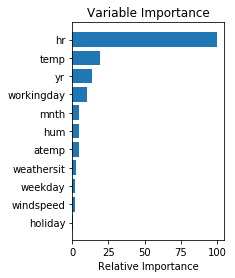

In [15]:
feature_importance = regr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [16]:
#Relative Error
RE= abs(y_pred-y_test)/y_test

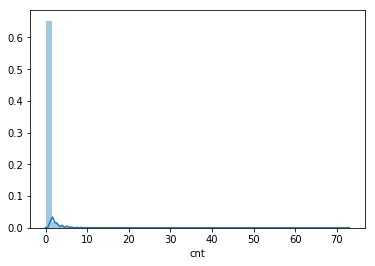

In [22]:
#Relative Error Histogram
sns.distplot(RE)
plt.show()

In [23]:
#Make a copy of day to process
day_data = day.copy()

In [24]:
categorical = ['yr','mnth','holiday','weekday','workingday','weathersit']

In [25]:
for feat in categorical:
    day_data[feat] = day_data[feat].apply(lambda x : str(x))

In [26]:
day_data.dtypes

instant         int64
dteday         object
season          int64
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [27]:
day_data.drop(['dteday', 'instant', 'season'], axis=1, inplace=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(day_data.drop(['casual','registered','cnt'],1), day_data['cnt'], test_size=0.33, random_state=42)

In [29]:
regr = DTR()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

In [30]:
mean_absolute_error(y_test,y_pred)

585.06611570247935

In [31]:
median_absolute_error(y_test,y_pred)

413.0

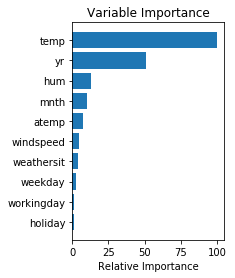

In [32]:
feature_importance = regr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [33]:
#Relative Error
RE= abs(y_pred-y_test)/y_test

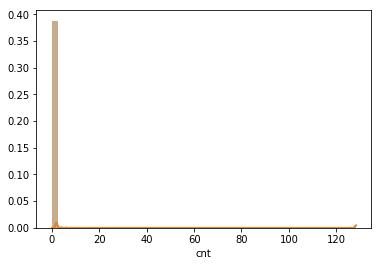

In [35]:
#Relative Error Histogram
sns.distplot(RE)
plt.show()

# One Anomaly Detected

In [36]:
RE[RE>10]

667    128.227273
Name: cnt, dtype: float64

Only one point with large relative error

In [37]:
max_err_idx = (abs(y_pred-y_test)/y_test).idxmax(axis=0)
max_err_pos = y_test.index.get_loc(max_err_idx)
y_test.iloc[max_err_pos],y_pred[max_err_pos]

(22, 2843.0)

In [38]:
(y_pred[max_err_pos]-y_test.iloc[max_err_pos])/y_test.iloc[max_err_pos]

128.22727272727272

In [39]:
day.loc[max_err_idx,'dteday']

'2012-10-29'

On 29-October-2012 Hurricane Sandy occured which is an anomaly